<a class="anchor" id="TableofContents"></a>
# Table of Contents 
* [1. Business Problem Statement](#BusinessProblemStatement)    
* [2. Loading packages](#Loadingpackages)
* [3. Data Description](#DataDescription)
    * [3.1 Column Types](# ColumnTypes)
    * [3.2 Majority Class Classifier Counts](#MajorityClassClassifierCounts)
* [4.  Examining Missing Values for train data](# ExaminingMissingValuesfortraindata)
    * [4.1 Identifying the number of columns that have missing values¶](#Identifyingthenumberofcolumnsthathavemissingvalues¶)
    * [4.2 Dropping columns with missing data percentage>66](#Droppingcolumnswithmissingdatapercentage>66)
    * [4.3 Dealing with XNA values in the Gender Column](#DealingwithXNAvaluesintheGenderColumn)
* [5. Examining Missing Values for test data](# ExaminingMissingValuesfortestdata)
    * [5.1 Identifying the number of columns that have missing values](#Identifyingthenumberofcolumnsthathavemissingvalues)
    * [5.2 Dropping columns with missing data percentage>66](#Droppingcolumnswithmissingdatapercentage>66)
    * [5.3 Dealing with XNA values in the Gender Column](#DealingwithXNAvaluesintheGenderColumn)
* [6. Categorical Values](#CategoricalValues)
    * [6.1 Handling categorical values in the train data¶](#Handlingcategoricalvaluesinthetraindata)
        * [6.1.1 Identifying the categorical columns](#Identifyingthecategoricalcolumns)
        * [6.1.2 Identifying categorical columns that have missing values](#6.1.2Identifyingcategoricalcolumnsthathave missingvalues)
        * [6.1.3 Filling NA values of the categorical columns with "Missing" value](#6.1.2Identifyingcategoricalcolumnsthathavemissingvalues)

    * [6.2 Handlingcategoricalvaluesinthetestdata](#FixingChildrenCount)
    * [6.3 Fixing Days Birth, Days ID Publish, Days Registration](#FixingDaysBirth,DaysIDPublish,DaysRegistration)
 

## 1. Business Problem Statement

### A significant portion of the population, particularly those with insufficient or non-existent credit histories, are more vulnerable to untrustworthy lenders who may take advantage of them. Home Credit looks to address this problem by providing a positive and safe borrowing experience for the unbanked population. The goal for this project will be the reduction in loan rejections for creditworthy individuals, and the improvement in clients' loan repayment rates compared to previous methods by using the target variable of whether a client is likely to repay the loan or not. Analytical Problem - This project is aiming to identify a predictive analytics model that will identify the customers who would be able to repay their loans as per the repayment calendar schedule. For this analytics project, we will use the existing dataset and associated data description to identify the appropriate predictors and come up with the final predictive analytics model.This notebook serves the purpose of identifying the best model after exploring different classification models to that can solve the Business problem of HomeCredit.

## 2. Loading packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

## 3. Data Description

In [2]:
df_train=pd.read_csv("application_train.csv")
df_test=pd.read_csv("application_test.csv")
df_bureau=pd.read_csv("bureau.csv")

In [3]:
df_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### As displayed above the main table consists of two separate files: one for the train dataset df_train, which includes the 'TARGET' variable, and one for the test dataset df_test, which does not include the 'TARGET' variable. This table represents static data for all loan applications in our data sample. Each row in the table represents a single loan application and contains various features such as the client's ID, the type of contract, the gender of the client, car ownership status, real estate ownership status, the number of children, the total income of the client, the credit amount, the annuity amount, and many other features related to the loan application. The table serves as a comprehensive source of static information about each loan application, providing insights into various aspects of the clients' profiles and loan details.

In [4]:
df_bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


#### The above dataframe df_bureau contains information about the previous credits of clients that were reported to the Credit Bureau by other financial institutions. It specifically pertains to clients who have a loan in our sample. For each loan in our sample, there can be multiple rows in the dataset, corresponding to the number of credits the client had before the application date. The dataset includes various features such as the status of the credit, currency type, duration of the credit, maximum amount overdue, credit type, and other relevant details. This information provides insights into the client's credit history and can be valuable for assessing their creditworthiness and financial behavior.

In [5]:
print(df_train.shape)
print(df_test.shape)
print(df_bureau.shape)

(307511, 122)
(48744, 121)
(1716428, 17)


### 3.1 Column Types

In [6]:
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
df_test.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [8]:
df_bureau.dtypes.value_counts()

float64    8
int64      6
object     3
dtype: int64

### 3.2 Majority Class Classifier Counts

In [9]:
target_counts=df_train['TARGET'].value_counts()
target_percent=target_counts/target_counts.sum()*100
print("percentage of rows having target as 0 (i.e. customers who do not default): ",target_percent[0])
print("percentage of rows having target as 1 (i.e. customers who default):",target_percent[1])

percentage of rows having target as 0 (i.e. customers who do not default):  91.92711805431351
percentage of rows having target as 1 (i.e. customers who default): 8.072881945686495


In [10]:
print(df_train[df_train["TARGET"]==0].shape)
print(df_train[df_train["TARGET"]==1].shape)

(282686, 122)
(24825, 122)


#### In the dataset, approximately 91.93% of the rows correspond to customers who do not default on their loans, while around 8.07% of the rows represent customers who default. This makes the customers who do not default a major class classifier

## 4. Examining Missing Values for train data

### 4.1 Identifying the number of columns that have missing values 

In [11]:
def missing_values_table(df):
        # Total missing values
        missing_val = df.isnull().sum() 
        # Percentage of missing values
        missing_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
        # Rename the columns
        missing_val_table_ren_columns = missing_val_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percentage of Missing Values'})
        # Sort the table by percentage of missing descending
        missing_val_table_ren_columns = missing_val_table_ren_columns[
            missing_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percentage of Missing Values', ascending=False).round(1) 
        # Print some summary information
        print ("There are " + str(missing_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
       
        # Return the dataframe with missing information
        return missing_val_table_ren_columns.head()

In [12]:
missing_values_table(df_train)

There are 67 columns that have missing values.


,Missing Values,Percentage of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4


#### We can see that 67 out of 122 columns have missing values. We can consider dropping the columns whose percentage of missing data is more than 66% in the code below.

### 4.2 Dropping columns with missing data percentage>66 

In [13]:
threshold = 66  # Setting the threshold percentage
# Calculating the total and percentage of missing values for each column
total = df_train.isnull().sum()
percentage = (df_train.isnull().sum() / df_train.isnull().count()) * 100
# Creating a mask to identify columns with more than the threshold percentage of missing values
mask = percentage > threshold
# Selecting the columns to remove
columns_to_remove = total[mask].index
# Removing the columns from the DataFrame
df_train = df_train.drop(columns=columns_to_remove)

In [14]:
df_train.shape

(307511, 106)

#### 16 columns were successfully dropped, thereby reducing the count of columns to 106. We will be using these 106 columns for further data preparation

### 4.3 Dealing with XNA values in the Gender Column

#### We observed that the dataset has additional XNA value under CODE_GENDER Column. Therefore, we removed the 4 rows that had XNA values. This resulted in reducing the row count from 307511 to 307507 that will be used going forward

In [15]:
df_train = df_train[df_train['CODE_GENDER'] != 'XNA']
df_train['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

## 5. Examining Missing Values for test data

### 5.1 Identifying the number of columns that have missing values

In [16]:
missing_values_table(df_test)

There are 64 columns that have missing values.


,Missing Values,Percentage of Missing Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4


### 5.2 Dropping columns with missing data percentage>66

#### Here we are dropping columns with missing values greater than 65% but retaining the OWN_CAR_AGE column as it might have some importance towards predicting the target after building the model

In [17]:
threshold = 65  # Setting the threshold percentage

# Calculating the total and percentage of missing values for each column
total = df_test.isnull().sum()
percentage = (df_test.isnull().sum() / df_test.isnull().count()) * 100

# Creating a mask to identify columns with more than the threshold percentage of missing values
mask = percentage > threshold

# Select the columns to remove, except for 'OWN_CAR_AVG'
columns_to_remove = total[mask].index.tolist()
columns_to_remove.remove('OWN_CAR_AGE')

# Remove the columns from the DataFrame
df_test = df_test.drop(columns=columns_to_remove)

# Display the modified DataFrame
df_test.head(5)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 5.3 Dealing with XNA values in the Gender Column

In [18]:
df_test = df_test[df_test['CODE_GENDER'] != 'XNA']
df_test['CODE_GENDER'].value_counts()

F    32678
M    16066
Name: CODE_GENDER, dtype: int64

## 6. Categorical Values

### 6.1 Handling categorical values in the train data

#### 6.1.1 Identifying the categorical columns

In [19]:
#finding out the categorical columns before factorizing them
columns = df_train.columns

# Create an empty list to store the categorical columns
categorical_columns = []

# Iterate over each column and check if it has a non-numeric data type
for column in columns:
    if df_train[column].dtype != 'int64' and df_train[column].dtype != 'float64':
        categorical_columns.append(column)

# Print the list of categorical columns
print("Categorical columns in the train set are :")
print(categorical_columns)
print("The number of categorical columns in the train set are:",len(df_train.select_dtypes(include=['object']).columns))

Categorical columns in the train set are :
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
The number of categorical columns in the train set are: 15


#### 6.1.2 Identifying categorical columns that have missing values 

In [20]:
columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

missing_values = df_train[columns].isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0].index.tolist()

if len(columns_with_missing_values) > 0:
    print("The following columns have missing values:")
    for column in columns_with_missing_values:
        print(column)
else:
    print("No missing values found in the specified columns.")

The following columns have missing values:
NAME_TYPE_SUITE
OCCUPATION_TYPE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [21]:
#FIND COUNT

#### 6.1.3 Filling NA values of the categorical columns with "Missing" value

In [22]:
# List of categorical columns with missing values
categorical_columns = ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

# Replace missing values with "Missing" in the categorical columns
for column in categorical_columns:
    df_train[column] = df_train[column].fillna("Missing")


In [23]:
df_train.shape

(307507, 106)

### 6.2 Handling categorical values in the test data

#### 6.2.1 Identifying the categorical columns

In [24]:
#finding out the categorical columns before factorizing them
columns = df_test.columns

# Create an empty list to store the categorical columns
categorical_columns = []

# Iterate over each column and check if it has a non-numeric data type
for column in columns:
    if df_test[column].dtype != 'int64' and df_test[column].dtype != 'float64':
        categorical_columns.append(column)

# Print the list of categorical columns
print("Categorical columns in the test set are :")
print(categorical_columns)
print("The number of categorical columns in the test set are:",len(df_test.select_dtypes(include=['object']).columns))

Categorical columns in the test set are :
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
The number of categorical columns in the test set are: 15


#### 6.2.2 Identifying categorical columns that have missing values

In [25]:
columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

missing_values = df_test[columns].isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0].index.tolist()

if len(columns_with_missing_values) > 0:
    print("The following columns have missing values:")
    for column in columns_with_missing_values:
        print(column)
else:
    print("No missing values found in the specified columns.")

The following columns have missing values:
NAME_TYPE_SUITE
OCCUPATION_TYPE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


#### 6.2.3 Filling NA values of the categorical columns with "Missing" value

In [26]:
# List of categorical columns with missing values
categorical_columns = ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

# Replace missing values with "Missing" in the categorical columns
for column in categorical_columns:
    df_test[column] = df_test[column].fillna("Missing")


In [27]:
df_test.shape

(48744, 105)

#### Identifying unique values in 'NAME_INCOME_TYPE' and 'NAME_FAMILY_STATUS' column in both train and test data and dropping the column that are not present in either of them to assure the count of columns remain the same in both the datasets

In [28]:
df_train['NAME_INCOME_TYPE'].value_counts()

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [29]:
df_test['NAME_INCOME_TYPE'].value_counts()

Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Businessman                 1
Unemployed                  1
Name: NAME_INCOME_TYPE, dtype: int64

In [30]:
df_train['NAME_FAMILY_STATUS'].value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [31]:
df_test['NAME_FAMILY_STATUS'].value_counts()

Married                 32283
Single / not married     7036
Civil marriage           4261
Separated                2955
Widow                    2209
Name: NAME_FAMILY_STATUS, dtype: int64

In [32]:
#df_train.drop(df_train[df_train['NAME_INCOME_TYPE'] == 'Missing'].index, inplace=True)
df_train.drop(df_train[df_train['NAME_INCOME_TYPE'] == 'Maternity leave'].index, inplace=True)
df_train.drop(df_train[df_train['NAME_FAMILY_STATUS'] == 'Unknown'].index, inplace=True)

## 6.3 Label Encoding and One Hot Encoding for train and test data

##### We can observe that there are columns with more than 2 types of values. We use label encoding for columns with values equal to 2. Here "Label encoding" refers to the process of assigning unique integer labels to each category in a categorical variable. The labels are typically assigned in an arbitrary manner, without any specific order or meaning. For columns with values greater than two, we will one hot encode them. "One-hot encoding" is a technique used to represent categorical variables as binary vectors. It creates new binary columns, each corresponding to a unique category in the original variable, where a value of 1 indicates the presence of that category and 0 indicates the absence.

#### 6.3.1 Encoding train data

In [33]:
df_train.select_dtypes(include='object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64

#### 4 Columns with unique values less than or equal to two are label encoded and remaining 11 columns with unique values greater than 2 are one hot encoded as shown below

In [34]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

# Define the dataframe 'df' containing the columns

# Define the columns to label encode based on values <= 2
columns_to_encode = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Label encode the selected columns
label_encoder = LabelEncoder()

for column in columns_to_encode:
    if df_train[column].nunique() <= 2:  # Check if number of unique values is less than or equal to 2
        df_train[column] = label_encoder.fit_transform(df_train[column])
df_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,0,1,0,1
1,0,0,0,0
2,1,1,1,1
3,0,0,0,1
4,0,1,0,1


In [35]:
# One Hot Encoding
categorical_columns =['NAME_TYPE_SUITE',
                   'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                   'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
                   'WALLSMATERIAL_MODE','NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


# Perform one-hot encoding using get_dummies()
df_encoded_train = pd.get_dummies(df_train, columns=categorical_columns)

# Print the encoded DataFrame
df_encoded_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WALLSMATERIAL_MODE_Missing,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,1,0,0,1,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,1,0,0,0,0,0,0,1,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,1,0,0,0,0,0,0,1,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0,0,0,0,0,1,0,0


#### 6.3.2 Encoding test data

In [36]:
df_test.select_dtypes(include='object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64

#### 4 Columns with unique values less than or equal to two are label encoded and remaining 11 columns with unique values greater than 2 are one hot encoded as shown below

#### Performing Label and One Hot Encoding on test data 

In [37]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

# Define the dataframe 'df' containing the columns

# Define the columns to label encode based on values <= 2
columns_to_encode = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']

# Label encode the selected columns
label_encoder = LabelEncoder()

for column in columns_to_encode:
    if df_test[column].nunique() <=2:  # Check if number of unique values is less than or equal to 2
        df_test[column] = label_encoder.fit_transform(df_test[column])
df_test.head(5)


# Define a list of categorical columns to be one-hot encoded
categorical_columns =['NAME_TYPE_SUITE',
                   'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                   'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
                   'WALLSMATERIAL_MODE','NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


# Perform one-hot encoding using get_dummies()
df_encoded_test = pd.get_dummies(df_test, columns=categorical_columns)

# Print the encoded DataFrame
df_encoded_test.head()



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Missing,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,1,0,0,1,0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,1,0,0,0,0,0,0,1,0,0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,1,0,0,0,0,0,0,1,0,0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,1,0,0,0,1,0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,1,0,0,0,0,0,0,1,0,0


#### We encountered that one hot encoding has resulted in duplicate columns in both the test and train data. We are dropping duplicates while retaining the original columns as shown below 

In [38]:
# Assuming df_encoded_train is the DataFrame

# Identify the duplicate columns
duplicate_columns_train = df_encoded_train.columns[df_encoded_train.columns.duplicated()]
duplicate_columns_test = df_encoded_test.columns[df_encoded_test.columns.duplicated()]
# Print the duplicate column names
print("The number of duplicates in the train data are:",len(duplicate_columns_train))
print("The number of duplicates in the test data are:",len(duplicate_columns_test))

The number of duplicates in the train data are: 39
The number of duplicates in the test data are: 39


In [39]:
# Assuming df_encoded_train is the DataFrame

# Identify the duplicate columns
duplicate_columns = df_encoded_train.columns[df_encoded_train.columns.duplicated()]

# Drop duplicate columns while keeping one
df_encoded_train_unique = df_encoded_train.loc[:, ~df_encoded_train.columns.duplicated()]

# Print the DataFrame with duplicate columns dropped
df_encoded_train_unique.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WALLSMATERIAL_MODE_Missing,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,1,0,0,1,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,1,0,0,0,0,0,0,1,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,1,0,0,0,0,0,0,1,0,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0,0,0,0,0,1,0,0


In [40]:
df_encoded_train_unique.shape

(307500, 225)

In [41]:
# Assuming df_encoded_train is the DataFrame

# Identify the duplicate columns
duplicate_columns = df_encoded_test.columns[df_encoded_test.columns.duplicated()]

# Drop duplicate columns while keeping one
df_encoded_test_unique = df_encoded_test.loc[:, ~df_encoded_test.columns.duplicated()]

# Print the DataFrame with duplicate columns dropped
df_encoded_test_unique.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Missing,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,1,0,0,1,0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,1,0,0,0,0,0,0,1,0,0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,1,0,0,0,0,0,0,1,0,0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,1,0,0,0,1,0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,1,0,0,0,0,0,0,1,0,0


In [42]:
df_encoded_test_unique.shape

(48744, 224)

### Conclusion based on the above evaluation: We have converted all the categorical columns to numerical columns in both the train and test data while keeping the column size same( Except the 'TARGET' column in test data)

## 7. Numerical Columns

#### 7.1 Identifying the percentage of missing values in each numerical column of the train dataset

In [43]:
# Assuming your dataset is stored in a variable named 'df'
numerical_columns = df_encoded_train_unique.select_dtypes(include='number').columns
missing_value_counts = df_encoded_train_unique[numerical_columns].isnull().sum()
total_values = len(df_train)

missing_value_percentages = (missing_value_counts / total_values) * 100

numerical_columns_with_missing_values = missing_value_percentages[missing_value_percentages > 0]
print(numerical_columns_with_missing_values.sort_values(ascending=False))

OWN_CAR_AGE                     65.990569
LANDAREA_AVG                    59.376585
LANDAREA_MEDI                   59.376585
LANDAREA_MODE                   59.376585
BASEMENTAREA_MEDI               58.516423
BASEMENTAREA_MODE               58.516423
BASEMENTAREA_AVG                58.516423
EXT_SOURCE_1                    56.381789
NONLIVINGAREA_MODE              55.179187
NONLIVINGAREA_MEDI              55.179187
NONLIVINGAREA_AVG               55.179187
ELEVATORS_MEDI                  53.296260
ELEVATORS_MODE                  53.296260
ELEVATORS_AVG                   53.296260
APARTMENTS_MODE                 50.749919
APARTMENTS_AVG                  50.749919
APARTMENTS_MEDI                 50.749919
ENTRANCES_MEDI                  50.348943
ENTRANCES_MODE                  50.348943
ENTRANCES_AVG                   50.348943
LIVINGAREA_MEDI                 50.193496
LIVINGAREA_MODE                 50.193496
LIVINGAREA_AVG                  50.193496
FLOORSMAX_MODE                  49

#### 7.1.1 Binning OWN_CAR_AGE values and removing NA values

In [44]:
def process_own_car_age(df):
    df_encoded_train_unique['OWN_CAR_AGE'].fillna(0, inplace=True)
    df_encoded_train_unique['OWN_CAR_AGE'] = df_encoded_train_unique['OWN_CAR_AGE'].apply(lambda x: 0 if x == 0 else (1 if 10 <= x <= 20 else (2 if 21 <= x <= 30 else 3)))
    return df_encoded_train
process_own_car_age(df_encoded_train_unique)
df_encoded_train_unique['OWN_CAR_AGE'].value_counts()



/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/392136176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_train_unique['OWN_CAR_AGE'].fillna(0, inplace=True)
/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/392136176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_train_unique['OWN_CAR_AGE'] = df_encoded_train_unique['OWN_CAR_AGE'].apply(lambda x: 0 if x == 0 else (1 if 10 <= x <= 20 else (2 if 21 <= x <= 30 else 3)))


0    205055
3     56297
1     38026
2      8122
Name: OWN_CAR_AGE, dtype: int64

#### 7.1.2 DAYS_EMPLOYED column has 365243 as a NA value

#### Replacing this value with the mean of the column and converting the negative values to positive using absolute method

In [45]:
df_encoded_train_unique['DAYS_EMPLOYED']=df_encoded_train_unique['DAYS_EMPLOYED'].abs()

mean_value = df_encoded_train_unique.loc[df_encoded_train_unique['DAYS_EMPLOYED'] != 365243, 'DAYS_EMPLOYED'].mean()
df_encoded_train_unique['DAYS_EMPLOYED'].replace(365243, mean_value, inplace=True)
df_encoded_train_unique['DAYS_EMPLOYED'].describe()

/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/2772748304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_train_unique['DAYS_EMPLOYED']=df_encoded_train_unique['DAYS_EMPLOYED'].abs()
/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/2772748304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_train_unique['DAYS_EMPLOYED'].replace(365243, mean_value, inplace=True)


count    307500.000000
mean       2384.150631
std        2117.364389
min           0.000000
25%         933.000000
50%        2219.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

#### 7.1.3 Converting columns with negative values to positive values

##### DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_EMPLOYED have negative values which are converted to positive using absolute method

In [46]:
df_encoded_train_unique['DAYS_BIRTH']=df_encoded_train_unique['DAYS_BIRTH'].abs()
df_encoded_train_unique['DAYS_REGISTRATION']=df_encoded_train_unique['DAYS_REGISTRATION'].abs()
df_encoded_train_unique['DAYS_ID_PUBLISH']=df_encoded_train_unique['DAYS_ID_PUBLISH'].abs()
df_encoded_train_unique['DAYS_EMPLOYED']=df_encoded_train_unique['DAYS_EMPLOYED'].abs()

/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/1167011642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_train_unique['DAYS_BIRTH']=df_encoded_train_unique['DAYS_BIRTH'].abs()
/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/1167011642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_train_unique['DAYS_REGISTRATION']=df_encoded_train_unique['DAYS_REGISTRATION'].abs()
/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/1167011642.py

In [47]:
print(df_encoded_train_unique['DAYS_BIRTH'].describe())
print(df_encoded_train_unique['DAYS_REGISTRATION'].describe())
print(df_encoded_train_unique['DAYS_ID_PUBLISH'].describe())
print(df_encoded_train_unique['DAYS_EMPLOYED'].describe())

count    307500.000000
mean      16037.069246
std        4363.988872
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64
count    307500.000000
mean       4986.152449
std        3522.883278
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.250000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64
count    307500.000000
mean       2994.203493
std        1509.452794
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64
count    307500.000000
mean       2384.150631
std        2117.364389
min           0.000000
25%         933.000000
50%        2219.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64


#### 7.2 Identifying the percentage of missing values in each numerical column of the test dataset

In [48]:
numerical_columns = df_encoded_test_unique.select_dtypes(include='number').columns
missing_value_counts = df_encoded_test_unique[numerical_columns].isnull().sum()
total_values = len(df_test)

missing_value_percentages = (missing_value_counts / total_values) * 100

numerical_columns_with_missing_values = missing_value_percentages[missing_value_percentages > 0]
print(numerical_columns_with_missing_values.sort_values(ascending=False))

OWN_CAR_AGE                     66.289184
LANDAREA_AVG                    57.964057
LANDAREA_MEDI                   57.964057
LANDAREA_MODE                   57.964057
BASEMENTAREA_AVG                56.706466
BASEMENTAREA_MODE               56.706466
BASEMENTAREA_MEDI               56.706466
NONLIVINGAREA_MEDI              53.512227
NONLIVINGAREA_MODE              53.512227
NONLIVINGAREA_AVG               53.512227
ELEVATORS_MODE                  51.676104
ELEVATORS_MEDI                  51.676104
ELEVATORS_AVG                   51.676104
APARTMENTS_MODE                 49.005006
APARTMENTS_MEDI                 49.005006
APARTMENTS_AVG                  49.005006
ENTRANCES_AVG                   48.373133
ENTRANCES_MEDI                  48.373133
ENTRANCES_MODE                  48.373133
LIVINGAREA_MEDI                 48.317742
LIVINGAREA_MODE                 48.317742
LIVINGAREA_AVG                  48.317742
FLOORSMAX_MODE                  47.843837
FLOORSMAX_AVG                   47

#### 7.2.1 Binning OWN_CAR_AGE values and removing NA values

In [49]:
def process_own_car_age(df):
    df_encoded_test_unique['OWN_CAR_AGE'].fillna(0, inplace=True)
    df_encoded_test_unique['OWN_CAR_AGE'] = df_encoded_test_unique['OWN_CAR_AGE'].apply(lambda x: 0 if x == 0 else (1 if 10 <= x <= 20 else (2 if 21 <= x <= 30 else 3)))
    return df_encoded_test_unique
process_own_car_age(df_encoded_test_unique)
df_encoded_test_unique['OWN_CAR_AGE'].value_counts()

/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/3692629660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_test_unique['OWN_CAR_AGE'].fillna(0, inplace=True)
/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/3692629660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_test_unique['OWN_CAR_AGE'] = df_encoded_test_unique['OWN_CAR_AGE'].apply(lambda x: 0 if x == 0 else (1 if 10 <= x <= 20 else (2 if 21 <= x <= 30 else 3)))


0    32430
3     9160
1     5939
2     1215
Name: OWN_CAR_AGE, dtype: int64

#### 7.2.2 DAYS_EMPLOYED column has 365243 as a NA value

#### Replacing this value with the mean of the column and converting the negative values to positive using absolute method

In [50]:
df_encoded_test_unique['DAYS_EMPLOYED']=df_encoded_test_unique['DAYS_EMPLOYED'].abs()

mean_value = df_encoded_test_unique.loc[df_encoded_test_unique['DAYS_EMPLOYED'] != 365243, 'DAYS_EMPLOYED'].mean()
df_encoded_test_unique['DAYS_EMPLOYED'].replace(365243, mean_value, inplace=True)
df_encoded_test_unique['DAYS_EMPLOYED'].describe()

/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/1070129205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_test_unique['DAYS_EMPLOYED']=df_encoded_test_unique['DAYS_EMPLOYED'].abs()
/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/1070129205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_test_unique['DAYS_EMPLOYED'].replace(365243, mean_value, inplace=True)


count    48744.000000
mean      2476.738941
std       2076.829996
min          1.000000
25%       1048.000000
50%       2432.000000
75%       2910.000000
max      17463.000000
Name: DAYS_EMPLOYED, dtype: float64

#### 7.2.3 Converting columns with negative values to positive values

#### DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_EMPLOYED have negative values which are converted to positive using absolute method

In [51]:
df_encoded_test_unique['DAYS_BIRTH']=df_encoded_test_unique['DAYS_BIRTH'].abs()
df_encoded_test_unique['DAYS_REGISTRATION']=df_encoded_test_unique['DAYS_REGISTRATION'].abs()
df_encoded_test_unique['DAYS_ID_PUBLISH']=df_encoded_test_unique['DAYS_ID_PUBLISH'].abs()
df_encoded_test_unique['DAYS_EMPLOYED']=df_encoded_test_unique['DAYS_EMPLOYED'].abs()

/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/550849824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_test_unique['DAYS_BIRTH']=df_encoded_test_unique['DAYS_BIRTH'].abs()
/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/550849824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_test_unique['DAYS_REGISTRATION']=df_encoded_test_unique['DAYS_REGISTRATION'].abs()
/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/550849824.py:3: Set

In [52]:
print(df_encoded_test_unique['DAYS_BIRTH'].describe())
print(df_encoded_test_unique['DAYS_REGISTRATION'].describe())
print(df_encoded_test_unique['DAYS_ID_PUBLISH'].describe())
print(df_encoded_test_unique['DAYS_EMPLOYED'].describe())

count    48744.000000
mean     16068.084605
std       4325.900393
min       7338.000000
25%      12496.000000
50%      15785.000000
75%      19637.000000
max      25195.000000
Name: DAYS_BIRTH, dtype: float64
count    48744.000000
mean      4967.652716
std       3552.612035
min          0.000000
25%       1901.000000
50%       4490.000000
75%       7459.250000
max      23722.000000
Name: DAYS_REGISTRATION, dtype: float64
count    48744.000000
mean      3051.712949
std       1569.276709
min          0.000000
25%       1706.000000
50%       3234.000000
75%       4448.000000
max       6348.000000
Name: DAYS_ID_PUBLISH, dtype: float64
count    48744.000000
mean      2476.738941
std       2076.829996
min          1.000000
25%       1048.000000
50%       2432.000000
75%       2910.000000
max      17463.000000
Name: DAYS_EMPLOYED, dtype: float64


## 8. Finding Correlations 

In [53]:
correlations = df_encoded_train_unique.corr()['TARGET'].sort_values(ascending= False)

#### Identifying top and bottom 10 columns that have positive and negative correlation with the 'TARGET'

In [54]:
correlations.head(10)

TARGET                                               1.000000
REGION_RATING_CLIENT_W_CITY                          0.060875
REGION_RATING_CLIENT                                 0.058882
NAME_INCOME_TYPE_Working                             0.057504
DAYS_LAST_PHONE_CHANGE                               0.055228
CODE_GENDER                                          0.054729
REG_CITY_NOT_WORK_CITY                               0.050981
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049804
FLAG_EMP_PHONE                                       0.045978
REG_CITY_NOT_LIVE_CITY                               0.044401
Name: TARGET, dtype: float64

In [55]:
correlations.tail(10)

FLOORSMAX_AVG                          -0.044005
ORGANIZATION_TYPE_XNA                  -0.045983
NAME_INCOME_TYPE_Pensioner             -0.046205
DAYS_ID_PUBLISH                        -0.051455
NAME_EDUCATION_TYPE_Higher education   -0.056578
DAYS_EMPLOYED                          -0.070088
DAYS_BIRTH                             -0.078236
EXT_SOURCE_1                           -0.155333
EXT_SOURCE_2                           -0.160451
EXT_SOURCE_3                           -0.178926
Name: TARGET, dtype: float64

## 9. Feature Engineering 

####  Adding new features to the train and test data to improve the performance and effectiveness of the models that we'll use to predict defaulting. Also, it helps to mitigate overfitting of the model

### 9.1 Adding new columns in the train data

In [56]:
df_encoded_train_unique['APPS_EXT_SOURCE_MEAN'] = df_encoded_train_unique[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
df_encoded_train_unique['APPS_EXT_SOURCE_STD'] = df_encoded_train_unique[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
df_encoded_train_unique['APPS_EXT_SOURCE_STD'] = df_encoded_train_unique['APPS_EXT_SOURCE_STD'].fillna(df_encoded_train_unique['APPS_EXT_SOURCE_STD'].mean())
    
    # AMT_CREDIT 
df_encoded_train_unique['APPS_ANNUITY_CREDIT_RATIO'] = df_encoded_train_unique['AMT_ANNUITY']/df_encoded_train_unique['AMT_CREDIT']
df_encoded_train_unique['APPS_GOODS_CREDIT_RATIO'] = df_encoded_train_unique['AMT_GOODS_PRICE']/df_encoded_train_unique['AMT_CREDIT']
    
    # AMT_INCOME_TOTAL 
df_encoded_train_unique['APPS_ANNUITY_INCOME_RATIO'] =df_encoded_train_unique['AMT_ANNUITY']/df_encoded_train_unique['AMT_INCOME_TOTAL']
df_encoded_train_unique['APPS_CREDIT_INCOME_RATIO'] = df_encoded_train_unique['AMT_CREDIT']/df_encoded_train_unique['AMT_INCOME_TOTAL']
df_encoded_train_unique['APPS_GOODS_INCOME_RATIO'] = df_encoded_train_unique['AMT_GOODS_PRICE']/df_encoded_train_unique['AMT_INCOME_TOTAL']
df_encoded_train_unique['APPS_CNT_FAM_INCOME_RATIO'] = df_encoded_train_unique['AMT_INCOME_TOTAL']/df_encoded_train_unique['CNT_FAM_MEMBERS']
    
    # DAYS_BIRTH, DAYS_EMPLOYED 
df_encoded_train_unique['APPS_EMPLOYED_BIRTH_RATIO'] = df_encoded_train_unique['DAYS_EMPLOYED']/df_encoded_train_unique['DAYS_BIRTH']
df_encoded_train_unique['APPS_INCOME_EMPLOYED_RATIO'] = df_encoded_train_unique['AMT_INCOME_TOTAL']/df_encoded_train_unique['DAYS_EMPLOYED']
df_encoded_train_unique['APPS_INCOME_BIRTH_RATIO'] = df_encoded_train_unique['AMT_INCOME_TOTAL']/df_encoded_train_unique['DAYS_BIRTH']
df_encoded_train_unique['APPS_CAR_BIRTH_RATIO'] = df_encoded_train_unique['OWN_CAR_AGE'] / df_encoded_train_unique['DAYS_BIRTH']
df_encoded_train_unique['APPS_CAR_EMPLOYED_RATIO'] = df_encoded_train_unique['OWN_CAR_AGE'] /df_encoded_train_unique['DAYS_EMPLOYED']

/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/863280389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_train_unique['APPS_EXT_SOURCE_MEAN'] = df_encoded_train_unique[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/863280389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_train_unique['APPS_EXT_SOURCE_STD'] = df_encoded_train_unique[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3

In [57]:
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df_encoded_train_unique['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df_encoded_train_unique.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df_encoded_train_unique.loc[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize=(12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df_encoded_train_unique.loc[df['TARGET'] == 0, var_name], label='Not default')
    sns.kdeplot(df_encoded_train_unique.loc[df['TARGET'] == 1, var_name], label='Default')
    
    # Label the plot
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.title('%s Distribution' % var_name)
    plt.legend()
    
    # Print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid = %0.4f' % avg_repaid)
    

### Testing some new features with the target using the training dataset


We picked 3 random new features to visualize their relationship with the target and see if they can add predictive power to the dataset. This will help us evaluate if our feature engineering can be impactuful when trying to find out best model.

The correlation between APPS_ANNUITY_CREDIT_RATIO and the TARGET is 0.0127
Median value for loan that was not repaid = 0.0500
Median value for loan that was repaid = 0.0500


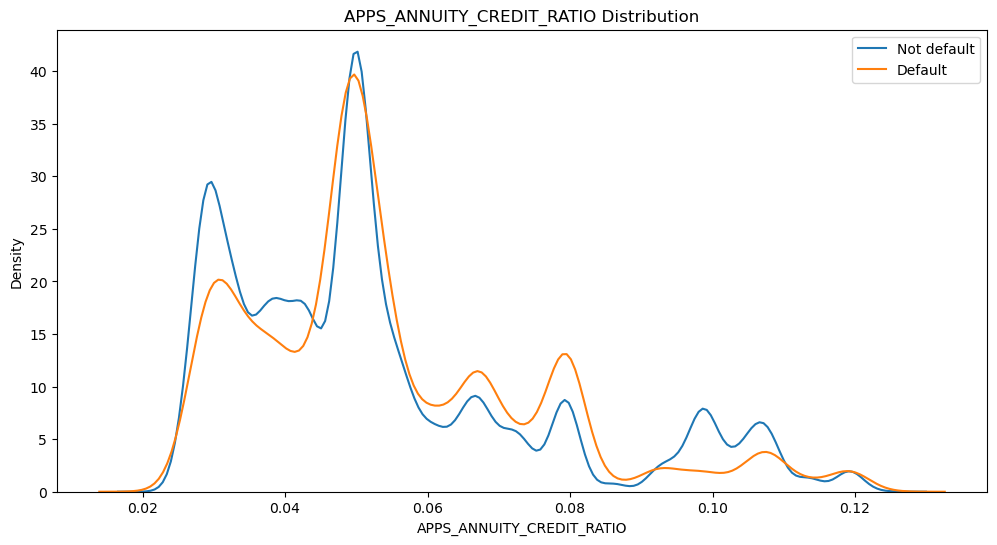

In [58]:
kde_target('APPS_ANNUITY_CREDIT_RATIO', df_encoded_train_unique)

The correlation between APPS_ANNUITY_CREDIT_RATIO and the TARGET is 0.0127
Median value for loan that was not repaid = 0.0500
Median value for loan that was repaid = 0.0500

The correlation between APPS_CREDIT_INCOME_RATIO and the TARGET is -0.0078
Median value for loan that was not repaid = 3.2529
Median value for loan that was repaid = 3.2667


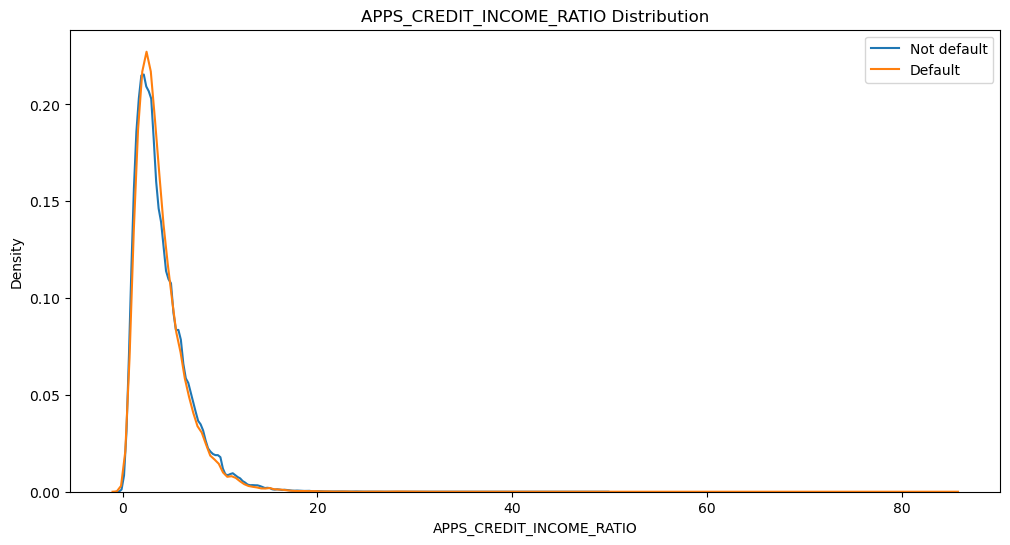

In [59]:
kde_target('APPS_CREDIT_INCOME_RATIO', df_encoded_train_unique)

The correlation between APPS_CREDIT_INCOME_RATIO and the TARGET is -0.0078
Median value for loan that was not repaid = 3.2529
Median value for loan that was repaid = 3.2667

The correlation between APPS_EMPLOYED_BIRTH_RATIO and the TARGET is -0.0553
Median value for loan that was not repaid = 0.1030
Median value for loan that was repaid = 0.1115


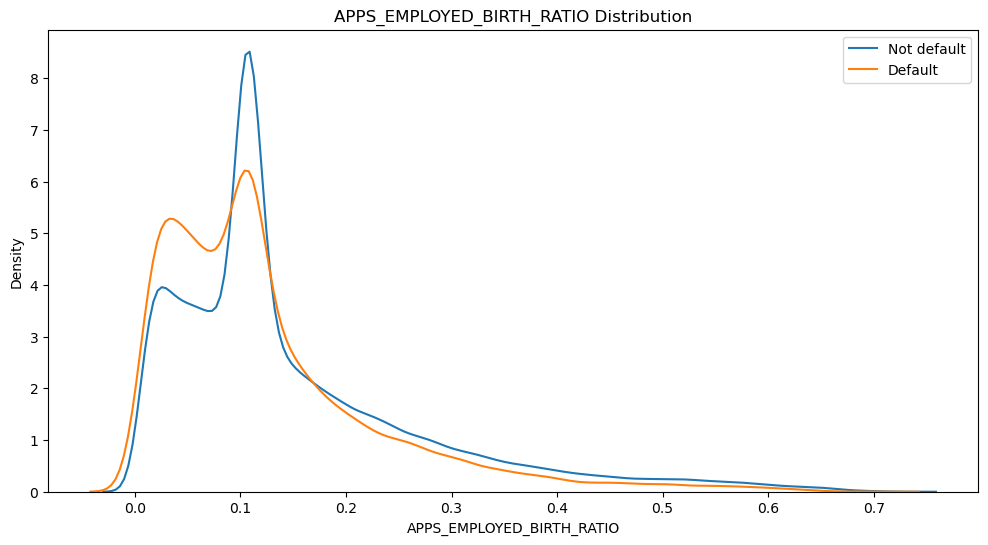

In [60]:
kde_target('APPS_EMPLOYED_BIRTH_RATIO', df_encoded_train_unique)

#### The correlation between APPS_EMPLOYED_BIRTH_RATIO and the TARGET is 0.0422, Median value for loan that was not repaid = 0.0790, Median value for loan that was repaid = 0.0898

### 9.2 Adding new columns in the test data

In [61]:
df_encoded_test_unique['APPS_EXT_SOURCE_MEAN'] = df_encoded_test_unique[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
df_encoded_test_unique['APPS_EXT_SOURCE_STD'] = df_encoded_test_unique[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
df_encoded_test_unique['APPS_EXT_SOURCE_STD'] = df_encoded_test_unique['APPS_EXT_SOURCE_STD'].fillna(df_encoded_test_unique['APPS_EXT_SOURCE_STD'].mean())
    
    # AMT_CREDIT 
df_encoded_test_unique['APPS_ANNUITY_CREDIT_RATIO'] = df_encoded_test_unique['AMT_ANNUITY']/df_encoded_test_unique['AMT_CREDIT']
df_encoded_test_unique['APPS_GOODS_CREDIT_RATIO'] = df_encoded_test_unique['AMT_GOODS_PRICE']/df_encoded_test_unique['AMT_CREDIT']
    
    # AMT_INCOME_TOTAL 
df_encoded_test_unique['APPS_ANNUITY_INCOME_RATIO'] =df_encoded_test_unique['AMT_ANNUITY']/df_encoded_test_unique['AMT_INCOME_TOTAL']
df_encoded_test_unique['APPS_CREDIT_INCOME_RATIO'] = df_encoded_test_unique['AMT_CREDIT']/df_encoded_test_unique['AMT_INCOME_TOTAL']
df_encoded_test_unique['APPS_GOODS_INCOME_RATIO'] = df_encoded_test_unique['AMT_GOODS_PRICE']/df_encoded_test_unique['AMT_INCOME_TOTAL']
df_encoded_test_unique['APPS_CNT_FAM_INCOME_RATIO'] = df_encoded_test_unique['AMT_INCOME_TOTAL']/df_encoded_test_unique['CNT_FAM_MEMBERS']
    
    # DAYS_BIRTH, DAYS_EMPLOYED 
df_encoded_test_unique['APPS_EMPLOYED_BIRTH_RATIO'] = df_encoded_test_unique['DAYS_EMPLOYED']/df_encoded_test_unique['DAYS_BIRTH']
df_encoded_test_unique['APPS_INCOME_EMPLOYED_RATIO'] = df_encoded_test_unique['AMT_INCOME_TOTAL']/df_encoded_test_unique['DAYS_EMPLOYED']
df_encoded_test_unique['APPS_INCOME_BIRTH_RATIO'] = df_encoded_test_unique['AMT_INCOME_TOTAL']/df_encoded_test_unique['DAYS_BIRTH']
df_encoded_test_unique['APPS_CAR_BIRTH_RATIO'] = df_encoded_test_unique['OWN_CAR_AGE'] / df_encoded_test_unique['DAYS_BIRTH']
df_encoded_test_unique['APPS_CAR_EMPLOYED_RATIO'] = df_encoded_test_unique['OWN_CAR_AGE'] /df_encoded_test_unique['DAYS_EMPLOYED']

/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/2369205670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_test_unique['APPS_EXT_SOURCE_MEAN'] = df_encoded_test_unique[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/2369205670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded_test_unique['APPS_EXT_SOURCE_STD'] = df_encoded_test_unique[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

### 9.3 Adding new columns in the bureau data

In [62]:
df_bureau['BUREAU_ENDDATE_FACT_DIFF'] = df_bureau['DAYS_CREDIT_ENDDATE'] - df_bureau['DAYS_ENDDATE_FACT']
df_bureau['BUREAU_CREDIT_FACT_DIFF'] = df_bureau['DAYS_CREDIT'] - df_bureau['DAYS_ENDDATE_FACT']
df_bureau['BUREAU_CREDIT_ENDDATE_DIFF'] = df_bureau['DAYS_CREDIT'] - df_bureau['DAYS_CREDIT_ENDDATE']
  

df_bureau['BUREAU_CREDIT_DEBT_RATIO']=df_bureau['AMT_CREDIT_SUM_DEBT']/df_bureau['AMT_CREDIT_SUM']

df_bureau['BUREAU_CREDIT_DEBT_DIFF'] = df_bureau['AMT_CREDIT_SUM_DEBT'] -df_bureau['AMT_CREDIT_SUM']
    

df_bureau['BUREAU_IS_DPD'] = df_bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
df_bureau['BUREAU_IS_DPD_OVER120'] = df_bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x >120 else 0)

In [63]:
  bureau_agg_dict = {
  'SK_ID_BUREAU':['count'],
  'DAYS_CREDIT':['min', 'max', 'mean'],
  'CREDIT_DAY_OVERDUE':['min', 'max', 'mean'],
  'DAYS_CREDIT_ENDDATE':['min', 'max', 'mean'],
  'DAYS_ENDDATE_FACT':['min', 'max', 'mean'],
  'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
  'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
  'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
  'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
  'AMT_ANNUITY': ['max', 'mean', 'sum'],
  'BUREAU_ENDDATE_FACT_DIFF':['min', 'max', 'mean'],
  'BUREAU_CREDIT_FACT_DIFF':['min', 'max', 'mean'],
  'BUREAU_CREDIT_ENDDATE_DIFF':['min', 'max', 'mean'],
  'BUREAU_CREDIT_DEBT_RATIO':['min', 'max', 'mean'],
  'BUREAU_CREDIT_DEBT_DIFF':['min', 'max', 'mean'],
  'BUREAU_IS_DPD':['mean', 'sum'],
  'BUREAU_IS_DPD_OVER120':['mean', 'sum']
  }

In [64]:
bureau_grp =df_bureau.groupby('SK_ID_CURR')
bureau_day_amt_agg = bureau_grp.agg(bureau_agg_dict)
bureau_day_amt_agg.head()
bureau_day_amt_agg.columns = ['BUREAU_'+('_').join(column).upper() for column in bureau_day_amt_agg.columns.ravel()]
bureau_day_amt_agg = bureau_day_amt_agg.reset_index()


/var/folders/wr/jqh8vp057dn07j_tw67dppvw0000gn/T/ipykernel_84471/2269447969.py:4: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  bureau_day_amt_agg.columns = ['BUREAU_'+('_').join(column).upper() for column in bureau_day_amt_agg.columns.ravel()]


In [65]:
bureau_day_amt_agg.head(5)

,SK_ID_CURR,BUREAU_SK_ID_BUREAU_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,...,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MIN,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MAX,BUREAU_BUREAU_CREDIT_DEBT_RATIO_MEAN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MIN,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MAX,BUREAU_BUREAU_CREDIT_DEBT_DIFF_MEAN,BUREAU_BUREAU_IS_DPD_MEAN,BUREAU_BUREAU_IS_DPD_SUM,BUREAU_BUREAU_IS_DPD_OVER120_MEAN,BUREAU_BUREAU_IS_DPD_OVER120_SUM
0,100001,7,-1572,-49,-735.000000,0,0,0.0,-1329.0,1778.0,...,0.0,0.987405,0.282518,-279720.0,-4761.0,-122382.642857,0.0,0,0.0,0
1,100002,8,-1437,-103,-874.000000,0,0,0.0,-1072.0,780.0,...,0.0,0.546180,0.136545,-204219.0,0.0,-98388.513000,0.0,0,0.0,0
2,100003,4,-2586,-606,-1400.750000,0,0,0.0,-2434.0,1216.0,...,0.0,0.000000,0.000000,-810000.0,-22248.0,-254350.125000,0.0,0,0.0,0
3,100004,2,-1326,-408,-867.000000,0,0,0.0,-595.0,-382.0,...,0.0,0.000000,0.000000,-94537.8,-94500.0,-94518.900000,0.0,0,0.0,0
4,100005,3,-373,-62,-190.666667,0,0,0.0,-128.0,1324.0,...,0.0,0.954794,0.601256,-58500.0,-4504.5,-29572.500000,0.0,0,0.0,0


### 9.4 Merging beureau data with train and test data

#### Merging the above newly added columns from bureau data to the train and test respectively so that it might help improve the performance of the model. We can find that once we run our data on the model

In [66]:
df_encoded_train_unique.merge(bureau_day_amt_agg, on='SK_ID_CURR', how='left')
df_encoded_test_unique.merge(bureau_day_amt_agg, on='SK_ID_CURR', how='left')
print(df_encoded_train_unique.shape)
print(df_encoded_test_unique.shape)

(307500, 238)
(48744, 237)


### 9.5 Correlation of 'TARGET' with newly added columns

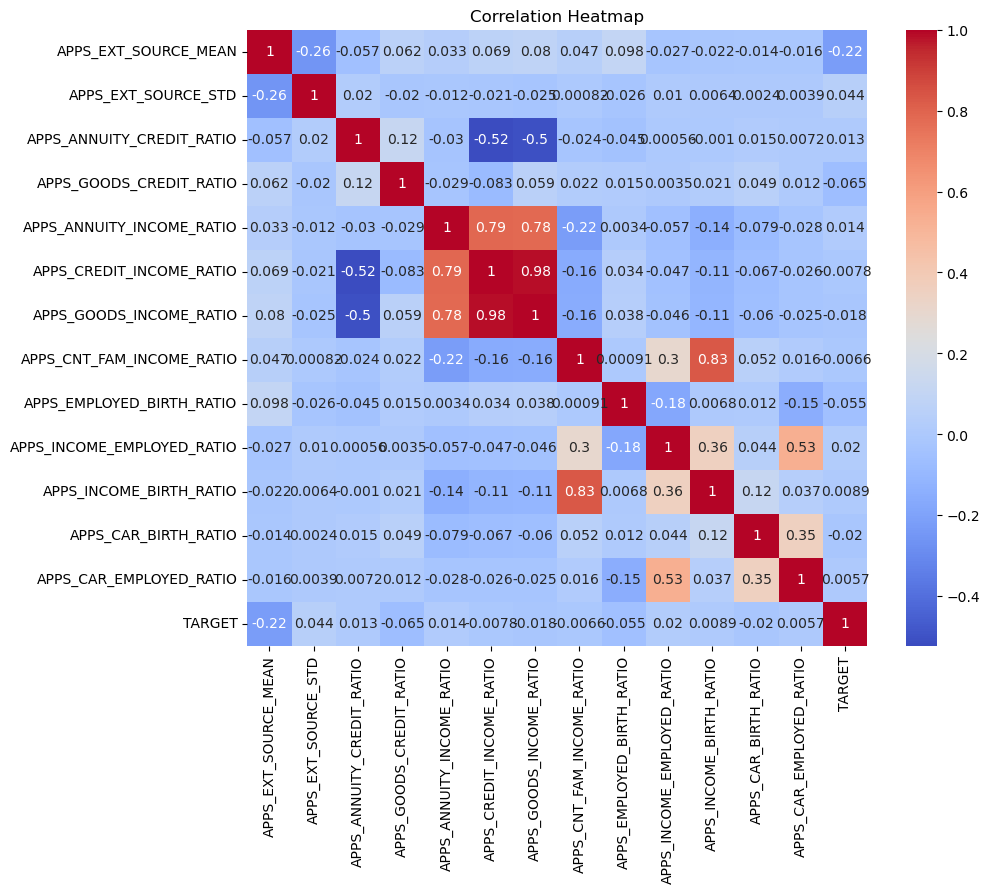

In [67]:
new_columns = [
    'APPS_EXT_SOURCE_MEAN',
    'APPS_EXT_SOURCE_STD',
    'APPS_ANNUITY_CREDIT_RATIO',
    'APPS_GOODS_CREDIT_RATIO',
    'APPS_ANNUITY_INCOME_RATIO',
    'APPS_CREDIT_INCOME_RATIO',
    'APPS_GOODS_INCOME_RATIO',
    'APPS_CNT_FAM_INCOME_RATIO',
    'APPS_EMPLOYED_BIRTH_RATIO',
    'APPS_INCOME_EMPLOYED_RATIO',
    'APPS_INCOME_BIRTH_RATIO',
    'APPS_CAR_BIRTH_RATIO',
    'APPS_CAR_EMPLOYED_RATIO'
]

correlation_matrix = df_encoded_train_unique[new_columns + ['TARGET']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#### As seen above many of the newly created features above have a nominal correlation with the TARGET than the original features. However this does not mean that keeping these features in our original dataset going to impact our final predictions in the expected way. 

## 10.  MODEL BUILDING

### 10.1 Obtaining a balanced dataframe

#### The number of rows sampled is determined by multiplying the number of rows in the positive class subset (df_encoded_train[df_encoded_train["TARGET"]==1].shape[0]) with a ratio of 70/30. This ratio ensures that the resulting balanced DataFrame has a 70:30 distribution between the positive and negative classes

In [68]:
balanced_df = pd.concat((df_encoded_train_unique[df_encoded_train_unique["TARGET"]==1], \
                        df_encoded_train_unique[df_encoded_train_unique["TARGET"]==0]. 
                        sample(n=int(df_encoded_train_unique[df_encoded_train_unique["TARGET"]==1].shape[0]*(65/35)))))
balanced_df.shape

(70922, 238)

#### While feature engineering we have added few new columns, they contain infinity values. Let us see what columns are those and figure out a way to fix it

In [69]:
columns_with_infinity = balanced_df.columns[~np.isfinite(balanced_df).all()]
print(columns_with_infinity)


Index(['AMT_GOODS_PRICE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ

#### Above are the columns with infinity values and they can be replaced by either mean or median of the column(we have used median)

In [70]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming balanced_df is the DataFrame containing the data

# Replace infinite values with NaN
balanced_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values by replacing NaN with column medians
imputer = SimpleImputer(strategy='median')
balanced_df = pd.DataFrame(imputer.fit_transform(balanced_df), columns=balanced_df.columns)


### 10.2 Logistic Regression 

In [71]:
X = balanced_df.drop('TARGET', axis=1)
y = balanced_df['TARGET']

# Handling missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)

# Fitting a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting the target variable on the training and testing sets
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

# Calculating the accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculating the AUC scores
train_auc = roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)

# Handling missing values in the test dataframe
X_test_imputed = imputer.transform(df_encoded_test_unique)

# Scaling the features in the test dataframe
X_test_scaled = scaler.transform(X_test_imputed)

# Predicting the target variable on the test dataframe
test_predictions = logreg.predict(X_test_scaled)

output_df = pd.DataFrame({'SK_ID_CURR': df_encoded_test_unique['SK_ID_CURR'], 'TARGET': test_predictions})
output_df.to_csv('logistic_regression_predictions.csv', index=False)

/Users/shivs/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.7163403070306854
Test Accuracy: 0.7237927388086006
Train AUC: 0.7532453780891644
Test AUC: 0.7536878409793446


#### The above fit model is a logistic regression model. When trained on the train data and tested on the test data it achieved an accuracy of ~0.72 and a kaggle public score of 0.64. It means that the model predicts the customers who default with an accuracy of 72%

### 10.3 Random Forest Model

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Separate the features (X) and the target variable (y)
X = balanced_df.drop('TARGET', axis=1)
y = balanced_df['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# hyperparameter values
n_estimators = 300
max_depth = None
max_features = "sqrt"
min_samples_split = 10
min_samples_leaf = 10

# Random Forest classifier
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,
                            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# fit on training data
rf.fit(X_train, y_train)

# predict target on test
predictions = rf.predict(X_test)

predictions_t=rf.predict(X_train)
# accuracy
accuracy = accuracy_score(y_test, predictions)
print("Train accuracy:",accuracy_score(y_train,predictions_t))
print("Test Accuracy:", accuracy)



# Handling missing values in the test dataframe
X_test_imputed = imputer.transform(df_encoded_test_unique)

# Scaling the features in the test dataframe
X_test_scaled = scaler.transform(X_test_imputed)

# Predicting the target variable on the test dataframe
test_predictions = rf.predict(X_test_scaled)


output_df = pd.DataFrame({'SK_ID_CURR': df_encoded_test_unique['SK_ID_CURR'], 'TARGET': test_predictions})
output_df.to_csv('rf_predictions.csv', index=False)

Cross-validation scores: [0.71413465 0.7093761  0.72160042 0.71014365 0.71102494]
Mean cross-validation score: 0.7132559529258694
Train accuracy: 0.8321201332463825
Test Accuracy: 0.7157560803665844


/Users/shivs/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 10.4 Gradient Boosting(Lightgbm)

In [73]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

X_train = balanced_df.drop('TARGET', axis=1)
y_train = balanced_df['TARGET']

# Imputing missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Train-Test split
X_train_split, X_test, y_train_split, y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Training the LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_train_split, y_train_split)

# Predict on the test set
test_predictions = model.predict(X_test)

# Calculate the accuracy on the validation set
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

# Handling missing values in the test dataset
X_test_imputed = imputer.transform(df_encoded_test_unique)

# Scaling the features in the test dataset
X_test_scaled = scaler.transform(X_test_imputed)

# Performing prediction on the test dataset
test_predictions = model.predict(X_test_scaled)

output_df = pd.DataFrame({'SK_ID_CURR': df_encoded_test_unique['SK_ID_CURR'], 'TARGET': test_predictions})
output_df.to_csv('gradient_boosting_predictions.csv', index=False)

# Print the DataFrame with predicted values
print(output_df.head())

Test Accuracy: 0.7270356009869581
   SK_ID_CURR  TARGET
0      100001     0.0
1      100005     0.0
2      100013     0.0
3      100028     0.0
4      100038     1.0
